In [45]:
from sklearn.datasets import load_diabetes
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# 1 Loading the dataset
diabetes = load_diabetes()
data = diabetes.data
feature_names = diabetes.feature_names
X = pd.DataFrame(data=data, columns=feature_names)
y = diabetes.target
y = pd.DataFrame(y, columns=['value'])

In [3]:
# Converting regression dataset to classification by taking threshold
y['value'] = y['value'].apply(lambda x: 1 if x > 200 else 0)
df = pd.concat([X,y], axis=1)

In [4]:
# 2 Dimension , head and tail
row, cols = df.shape
hd = df.head()
tl = df.tail()
print(hd)
print(tl)

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  value  
0 -0.002592  0.019907 -0.017646      0  
1 -0.039493 -0.068332 -0.092204      0  
2 -0.002592  0.002861 -0.025930      0  
3  0.034309  0.022688 -0.009362      1  
4 -0.002592 -0.031988 -0.046641      0  
          age       sex       bmi        bp        s1        s2        s3  \
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017293 -0.037344 -0.013840 -0.02499

In [5]:
# 3 features with data types
inf  = df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  value   442 non-null    int64  
dtypes: float64(10), int64(1)
memory usage: 38.1 KB


In [6]:
# 4 handling missing values
df['bmi'] = df['bmi'].fillna(df['bmi'].mean())
df['sex'] = df['sex'].fillna(df['sex'].mode()[0])
df['bp'] = df['bp'].fillna(df['bp'].median())

print(df['bmi'])
print(df['sex'])
print(df['bp'])

0      0.061696
1     -0.051474
2      0.044451
3     -0.011595
4     -0.036385
         ...   
437    0.019662
438   -0.015906
439   -0.015906
440    0.039062
441   -0.073030
Name: bmi, Length: 442, dtype: float64
0      0.050680
1     -0.044642
2      0.050680
3     -0.044642
4     -0.044642
         ...   
437    0.050680
438    0.050680
439    0.050680
440   -0.044642
441   -0.044642
Name: sex, Length: 442, dtype: float64
0      0.021872
1     -0.026328
2     -0.005670
3     -0.036656
4      0.021872
         ...   
437    0.059744
438   -0.067642
439    0.017293
440    0.001215
441   -0.081413
Name: bp, Length: 442, dtype: float64


In [14]:
# 5 Encoding --- category to numerical
import category_encoders as ce
df['sex'] = df['sex'].astype('str')
encoder= ce.OrdinalEncoder()
df['sex'] = encoder.fit_transform(df['sex'])
# df['sex'] = df['sex'].map({-0.044642 :0, 0.050680:1})
print(df['sex'])

0      1
1      2
2      1
3      2
4      2
      ..
437    1
438    1
439    1
440    2
441    2
Name: sex, Length: 442, dtype: int32


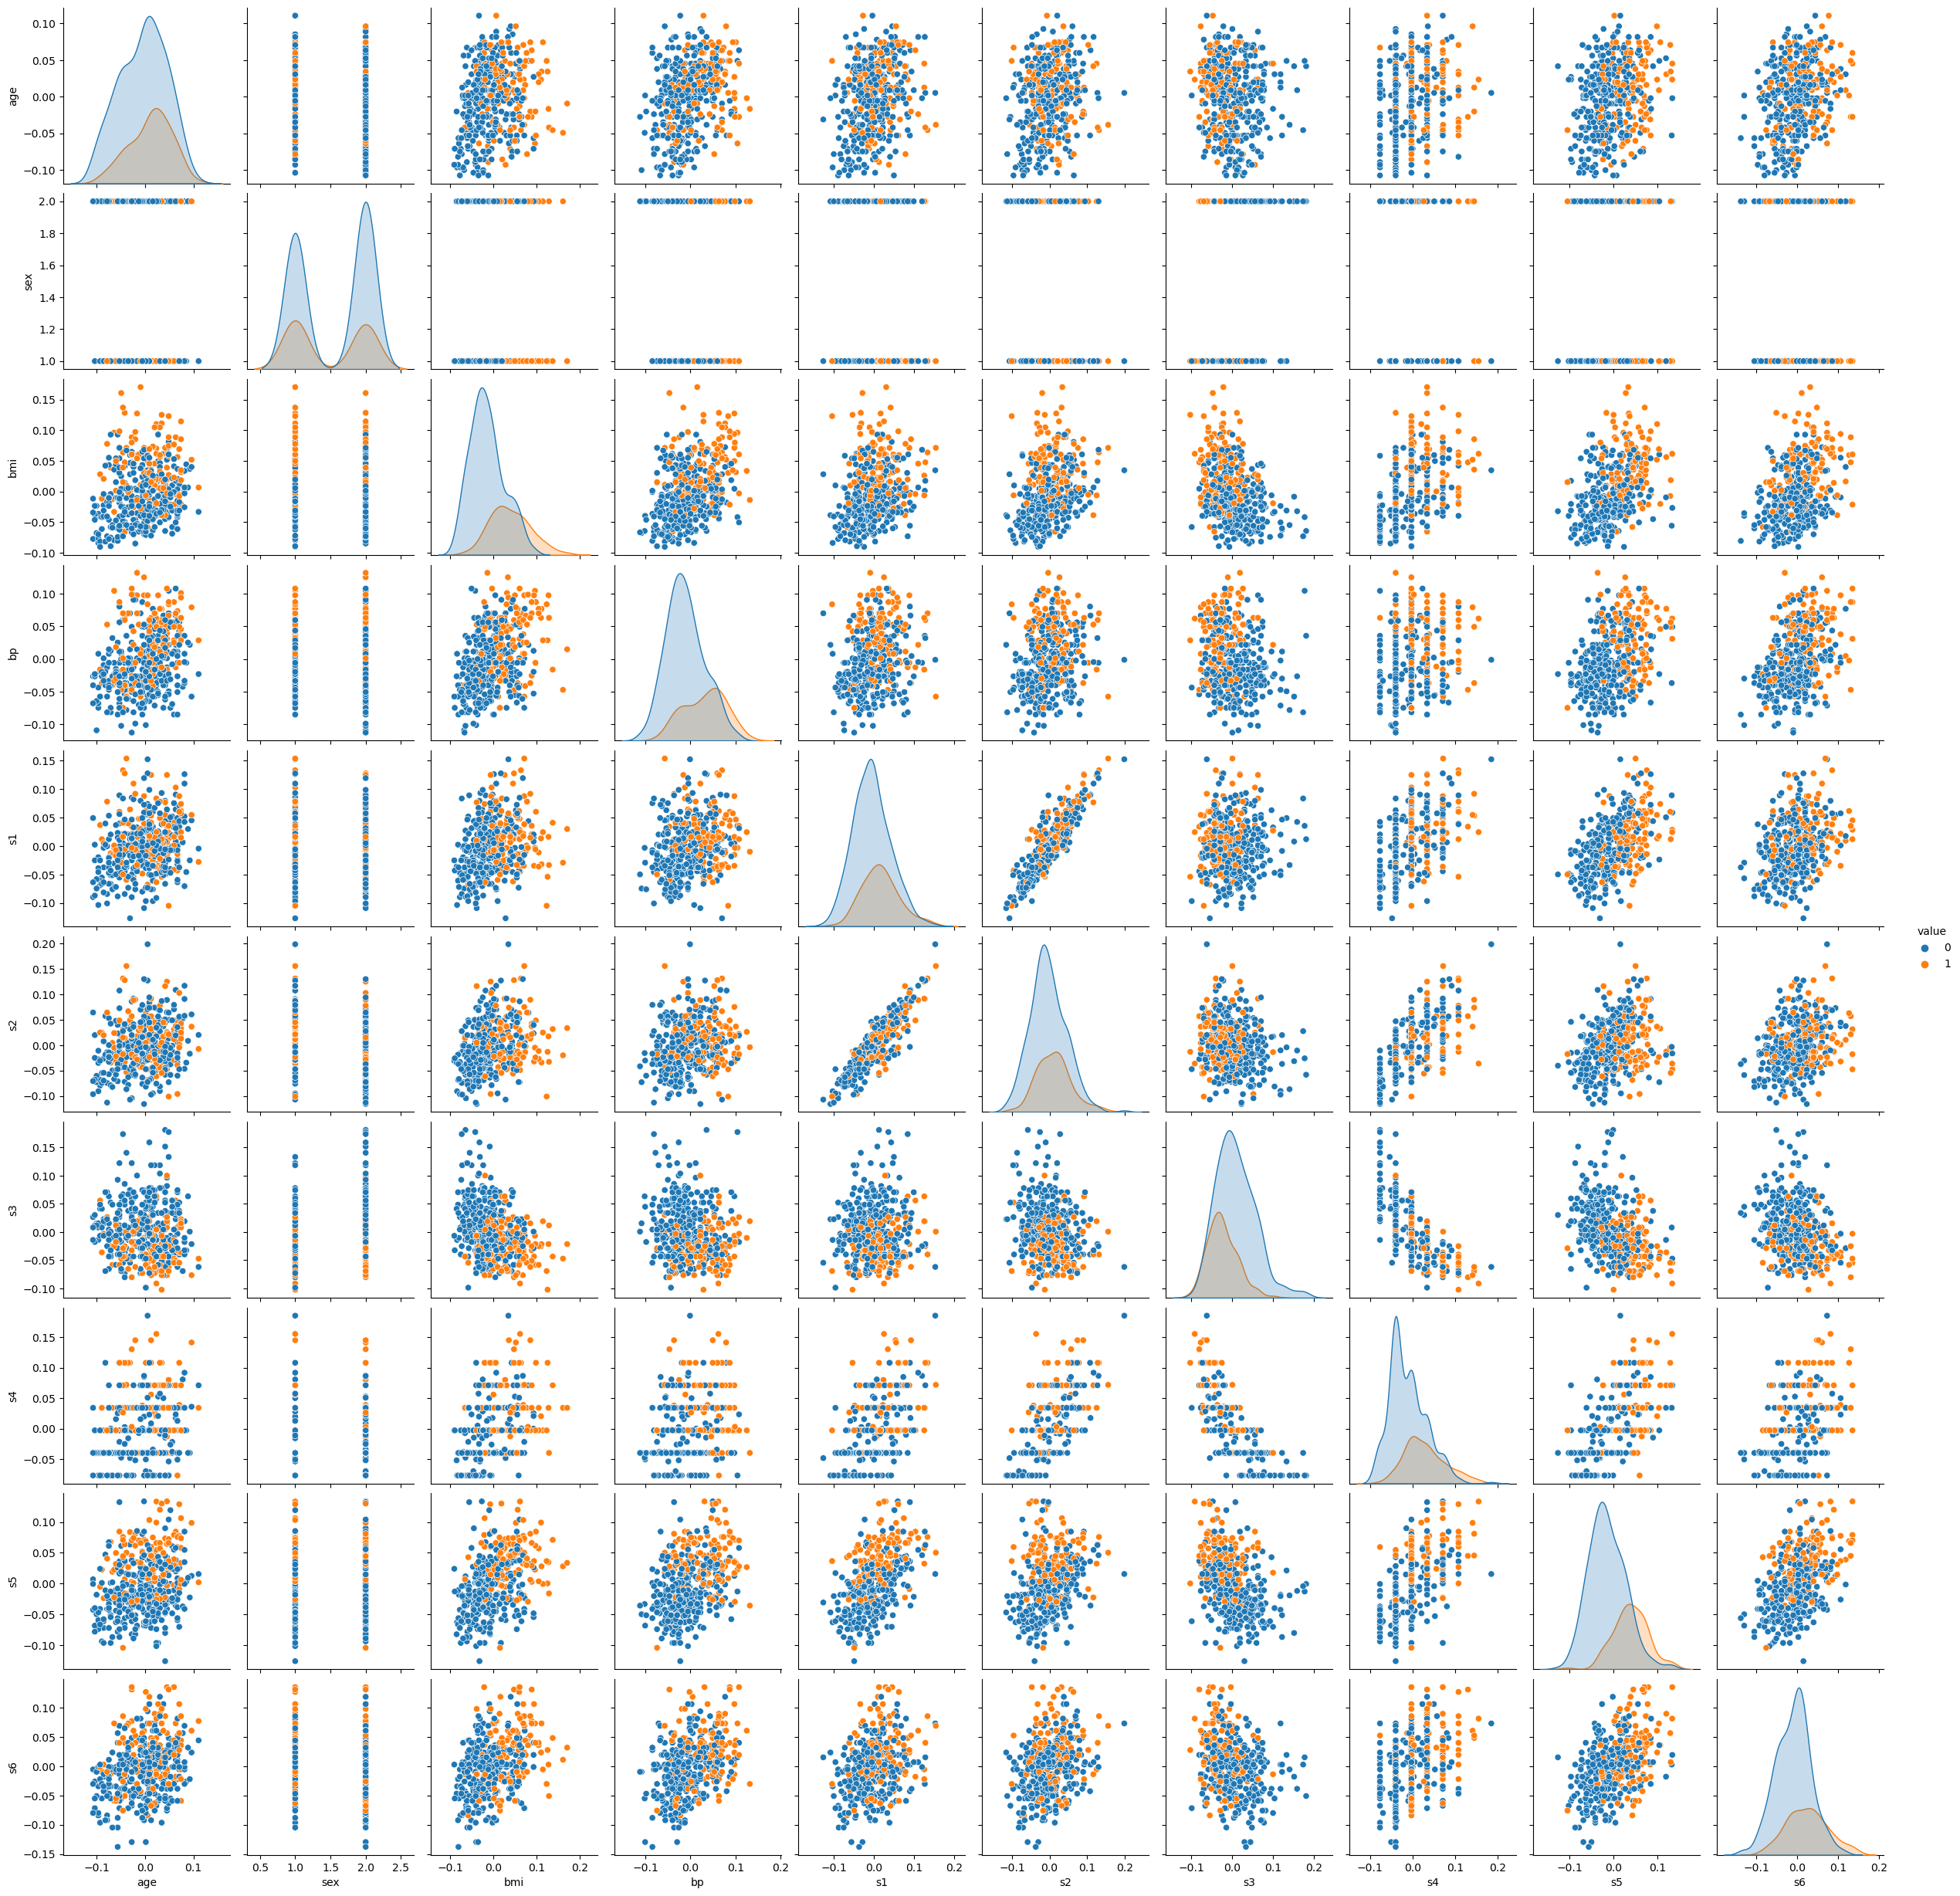

In [15]:
# 6 pair plot
sns.pairplot(data=df, hue='value')
plt.show()


In [39]:
# 7 description minimum, maximum, median, standard deviation
desc= df.describe()
desc
# # Minimum
#desc.loc['min']

# # Maximum
# desc.loc['max']

# # Median
# desc.loc['50%']  # This is equivalent to description.loc['median']

# # Standard deviation
# desc.loc['std']

# for a specific column
# desc.loc[:, 'age']

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,value
count,4.420000e+02,442.000000,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.531674,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,0.273756
std,4.761905e-02,0.499561,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,0.446390
min,-1.072256e-01,1.000000,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,0.000000
25%,-3.729927e-02,1.000000,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,0.000000
50%,5.383060e-03,2.000000,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,0.000000
75%,3.807591e-02,2.000000,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,1.000000
max,1.107267e-01,2.000000,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,1.000000


In [17]:
# 8 Train test split
X_train, X_test, y_train, y_test = train_test_split(X,  y, test_size=0.3, random_state=42)


In [42]:
# 9 KNN CLassifier 
# test with different values of neighbors [1,2,3,4,5]
for i in range(1,6):
    knn_classifier = KNeighborsClassifier(n_neighbors=i)
    knn_classifier.fit(X_train, y_train)
    y_pred = knn_classifier.predict(X_test)
    report = classification_report(y_test, y_pred)
    print(f'the classification report for k= {i}')
    print( report)
    print('accuracy is', accuracy_score(y_test, y_pred))

the classification report for k= 1
              precision    recall  f1-score   support

           0       0.79      0.83      0.81        98
           1       0.45      0.40      0.42        35

    accuracy                           0.71       133
   macro avg       0.62      0.61      0.62       133
weighted avg       0.70      0.71      0.71       133

accuracy is 0.7142857142857143
the classification report for k= 2
              precision    recall  f1-score   support

           0       0.75      0.98      0.85        98
           1       0.60      0.09      0.15        35

    accuracy                           0.74       133
   macro avg       0.68      0.53      0.50       133
weighted avg       0.71      0.74      0.67       133

accuracy is 0.7443609022556391
the classification report for k= 3
              precision    recall  f1-score   support

           0       0.80      0.93      0.86        98
           1       0.63      0.34      0.44        35

    accuracy   

In [46]:
# 10 F1 Measure
print(f1_score(y_test, y_pred))

0.4912280701754386
